# 3 - Regresión

**Sumario**

1. Introducción
2. Regresión lineal matemática
2. Funciones de pérdida
3. Regresión lineal simple con redes neuronales
4. Regresión no lineal múltiple con redes neuronales
5. Regularización

## 3.1 - Introducción

En tareas de regresión, nuestro objetivo es construir un modelo capaz de **predecir correctamente uno o varios valores numéricos continuos para cada uno de las instancias de entrada**. En este capítulo nos vamos a centrar en predecir un único valor numérico para cada una de las instancias. 

Por ejemplo, podemos querer predecir el precio de la vivienda en función de ciertos factores como el área de la casa, las habitaciones, el mobiliario, la cercanía a la carretera principal, etc.

<img src="images_3/vivienda.jpg" width="500" data-align="center">

Dependiendo del número de atributos que contemos para predecir, distinguimos dos tipos principales de regresión:
* **Regresión simple.** Contamos con un único atributo para predecir la variable objetivo.
* **Regresión múltiple.** Contamos con múltiples atributos para predecir la variable objetivo.

<table>
    <tr>
        <th>Regresión (lineal) simple</th>
        <th>regresión (lineal) múltiple</th>
    </tr>
    <tr>
        <td><img src="images_3/linear_regresion_simple.png" width="400" data-align="center"></td>
        <td><img src="images_3/linear_regresion_multiple.png" width="400" data-align="center"></td>
    </tr>
</table>

Dado un dataset con forma $(\mathbf{x}^{(i)}, y^{(i)})$, nuestro objetivo es aprender una función $f(\mathbf{x})$ con la que predecir $y$ dado $\mathbf{x}$, donde $y$ es un valor continuo. Dependiendo de la forma de $f(x)$, distinguimos dos tipos principales de regresión:
* **Regresión lineal.**
* **Regresión no lineal.**

<table>
    <tr>
        <th>Regresión lineal (simple)</th>
        <th>regresión no lineal (simple)</th>
    </tr>
    <tr>
        <td><img src="images_3/regresion_lineal.png" width="400" data-align="center"></td>
        <td><img src="images_3/regresion_no_lineal.png" width="800" data-align="center"></td>
    </tr>
</table>

En este caso, mostramos un ejemplo de regresión no lineal mediante el uso de un árbol de regresión. Otros métodos comunes de regresión no lineal incluyen: KNN y, por supuesto, **las redes neuronales**. Los métodos de regresión no lineal son **más flexibles**, pero por lo general son **menos interpretables**, ya que el modelo es considerablemente más complejo (e.g., las redes neuronales)

## 3.2 - Regresión lineal matemática

La regresión linal simple consiste en calcular un modelo de regresión que se corresponde con la ecuación de una recta:
    
$$
y = \beta_{0} + \beta_{1}x + \epsilon
$$

Donde $\beta_{0}$ se corresponde con la **ordenada de la recta**, $\beta_{1}$ con la **pendiente de la recta**, y $\epsilon$ con un **error aleatorio** o **residuo**. El proceso de estimación de los parámetros $\beta_{0}$ y $\beta_{1}$ (conocidos como los coeficientes de regresión) se suele realizar mediante el método de los mínimos cuadrados, cuya fórmula es la siguiente:

$$
\begin{align*}
\hat{\beta}_{1} &= \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}} = \frac{S_{y}}{S_{x}}R\\
\hat{\beta}_{0} &= \bar{y} - \beta_{1}x
\end{align*}
$$

Donde $S_{x}$ y $S_{y}$ son las desviaciones típicas de cada variable y $R$ es el coeficiente de correlación. Por su parte, $\beta_{0}$ se corresponde con el valor esperado de $y$ cuando $x=0$. La siguiente figura muestra la recta resultante de aplicar el método de minimoso cuadrados:

<img src="images_3/minimos_cuadrados.png" width="400" data-align="center">

### 3.2.1 - Condiciones para aplicar exitosamente la regresión lineal

A la hora de construir un modelo basado en una regresión lineal, deben cumplirse una serie de criteriors para poder calcular los parámetros de la recta:
    
* **Linealidad.** La relación entre la variable predictora y la variable a predecir debe ser lineal.
* **Distribución normal de los residuos.** Los residuos han de distribuirse de forma normal, con una media igual a 0. Esto se puede comprobar mediante un histograma o un test de hipótesis de normalidad. **Los valores extremos suelen ser una causa frecuente por la que se infringe la condición de normalidad**.
* **Varianza de residuos constante (homocedasticidad).** varianza de los residuos ha de ser prácticamente constante a lo largo del eje $x$.

Para comprobar si se cumplen estas condiciones, es necesario calcular los residuos y, a continuación validar el modelo.

### 3.2.1 Implementación de una regresión lineal simple con Tensorflow

#### Carga de datos


En primer lugar tenemos que cargar los datos y generar los splits de entrenamiento, validación y test. Utilizaremos el [Ames Housing dataset de Kaggle](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset) para ello. 

----

**Nota:** Por simplicidad, he descargado los datos de antemano y los he colocado en la carpeta "data" del directorio actual.

-----

<details>
    <summary><b>Explicación de las variables</b> (Hacer click)</summary>
  
* Feature variables:
    * **MSSubClass** : The building class
    * **MSZoning** : The general zoning classification
    * **LotFrontage** : Linear feet of street connected to property
    * **LotArea** : Lot size in square feet
    * **Street** : Type of road access
    * **Alley** : Type of alley access
    * **LotShape** : General shape of property
    * **LandContour** : Flatness of the property
    * **Utilities** : Type of utilities available
    * **LotConfig** : Lot configuration
    * **LandSlope** : Slope of property
    * **Neighborhood** : Physical locations within Ames city limits
    * **Condition1** : Proximity to main road or railroad
    * **Condition2** : Proximity to main road or railroad (if a second is present)
    * **BldgType** : Type of dwelling
    * **HouseStyle** : Style of dwelling
    * **OverallQual** : Overall material and finish quality
    * **OverallCond** : Overall condition rating
    * **YearBuilt** : Original construction date
    * **YearRemodAdd** : Remodel date
    * **RoofStyle** : Type of roof
    * **RoofMatl** : Roof material
    * **Exterior1st** : Exterior covering on house
    * **Exterior2nd** : Exterior covering on house (if more than one material)
    * **MasVnrType** : Masonry veneer type
    * **MasVnrArea** : Masonry veneer area in square feet
    * **ExterQual** : Exterior material quality
    * **ExterCond** : Present condition of the material on the exterior
    * **Foundation** : Type of foundation
    * **BsmtQual** : Height of the basement
    * **BsmtCond** : General condition of the basement
    * **BsmtExposure** : Walkout or garden level basement walls
    * **BsmtFinType1** : Quality of basement finished area
    * **BsmtFinSF1** : Type 1 finished square feet
    * **BsmtFinType2** : Quality of second finished area (if present)
    * **BsmtFinSF2** : Type 2 finished square feet
    * **BsmtUnfSF** : Unfinished square feet of basement area
    * **TotalBsmtSF** : Total square feet of basement area
    * **Heating** : Type of heating
    * **HeatingQC** : Heating quality and condition
    * **CentralAir** : Central air conditioning
    * **Electrical** : Electrical system
    * **1stFlrSF** : First Floor square feet
    * **2ndFlrSF** : Second floor square feet
    * **LowQualFinSF** : Low quality finished square feet (all floors)
    * **GrLivArea** : Above grade (ground) living area square feet
    * **BsmtFullBath** : Basement full bathrooms
    * **BsmtHalfBath** : Basement half bathrooms
    * **FullBath** : Full bathrooms above grade
    * **HalfBath** : Half baths above grade
    * **Bedroom** : Number of bedrooms above basement level
    * **Kitchen** : Number of kitchens
    * **KitchenQual** : Kitchen quality
    * **TotRmsAbvGrd** : Total rooms above grade (does not include bathrooms)
    * **Functional** : Home functionality rating
    * **Fireplaces** : Number of fireplaces
    * **FireplaceQu** : Fireplace quality
    * **GarageType** : Garage location
    * **GarageYrBlt** : Year garage was built
    * **GarageFinish** : Interior finish of the garage
    * **GarageCars** : Size of garage in car capacity
    * **GarageArea** : Size of garage in square feet
    * **GarageQual** : Garage quality
    * **GarageCond** : Garage condition
    * **PavedDrive** : Paved driveway
    * **WoodDeckSF** : Wood deck area in square feet
    * **OpenPorchSF** : Open porch area in square feet
    * **EnclosedPorch** : Enclosed porch area in square feet
    * **3SsnPorch** : Three season porch area in square feet
    * **ScreenPorch** : Screen porch area in square feet
    * **PoolArea** : Pool area in square feet
    * **PoolQC** : Pool quality
    * **Fence** : Fence quality
    * **MiscFeature** : Miscellaneous feature not covered in other categories
    * **MiscVal** : Value of miscellaneous feature in \$
    * **MoSold** : Month Sold
    * **YrSold** : Year Sold
    * **SaleType** : Type of sale
    * **SaleCondition** : Condition of sale


* Predictive variable:
    * **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
</details>

<br>

Para este ejemplo, vamos a utilizar como variable predictora el número de habitaciones en la casa (excluyendo las del sótano) `TotRms AbvGrd` y como variable a predecir el precio de la vivienda `SalePrice`.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("./data/AmesHousing.csv")

# Seleccionamos la columna que nos interesa como predictora y le aplicamos normalización estándar
data_x = data["TotRms AbvGrd"] / data["TotRms AbvGrd"].max()

# Seleccionamos la variabla predecir y le aplicamos normalización estándar
data_y = data["SalePrice"] / data["SalePrice"].max()

x_train, x_test, y_train, y_test = train_test_split(
    data_x,
    data_y,
    test_size=0.10,
    random_state=0
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.10,
    random_state=0
)

print(f"Training instances: {x_train.shape[0]}")
print(f"Validation instances: {x_val.shape[0]}")
print(f"Test instances: {x_test.shape[0]}")

Training instances: 2373
Validation instances: 264
Test instances: 293


#### Entrenamiento

Para el entrenamiento, vamos a definir el modelo a mano y utilizar el método del descenso por gradiente para su optimización. 

<img src="images_3/linear_Regression_gradient_descent.gif" width="400" data-align="center">

Con este propósito en mente, vamos a utilizar la API de diferenciación automatica de Tensorflow `tf.GradientTape`. [Para más información acerca de ella, recomiendo echar un ojo a la documentación original, especialmente su tutorial](https://www.tensorflow.org/api_docs/python/tf/GradientTape).

In [20]:
import tensorflow as tf

b0 = tf.Variable(0., dtype=tf.float32)
b1 = tf.Variable(0., dtype=tf.float32)

# Si disminuimos el lr, el modelo aprenderá mas lento pero será "más preciso" en su optimización. 
# En tal caso deberiamos aumentar el numero de epochs
lr = 0.1 
num_epochs = 10

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        with tf.GradientTape() as t:
            y_pred = b1 * x_train + b0
            current_loss = tf.reduce_mean(tf.square(y_pred - y_train))
        
        lr_b1, lr_b0 = tape.gradient(current_loss, [b1, b0])
        b1.assign_sub(lr * lr_b1)
        b0.assign_sub(lr * lr_b0)
        
        y_val_pred = b1 * x_val + b0
        val_loss = tf.reduce_mean(tf.square(y_val_pred - y_val))
        
        tf.print(f"Epoch: {epoch+1}")
        tf.print(f"Loss: {current_loss} - val_loss {val_loss}")

Epoch: 1
Loss: 0.06843797862529755 - val_loss 0.0429266095161438
Epoch: 2
Loss: 0.04415927454829216 - val_loss 0.02915279194712639
Epoch: 3
Loss: 0.03002299927175045 - val_loss 0.021184256300330162
Epoch: 4
Loss: 0.021791117265820503 - val_loss 0.01658261939883232
Epoch: 5
Loss: 0.01699644699692726 - val_loss 0.01393139734864235
Epoch: 6
Loss: 0.014202751219272614 - val_loss 0.01240827701985836
Epoch: 7
Loss: 0.012573916465044022 - val_loss 0.011536307632923126
Epoch: 8
Loss: 0.01162321213632822 - val_loss 0.011039153672754765
Epoch: 9
Loss: 0.011067281477153301 - val_loss 0.010756966657936573
Epoch: 10
Loss: 0.010741183534264565 - val_loss 0.010597459971904755


#### Visualización

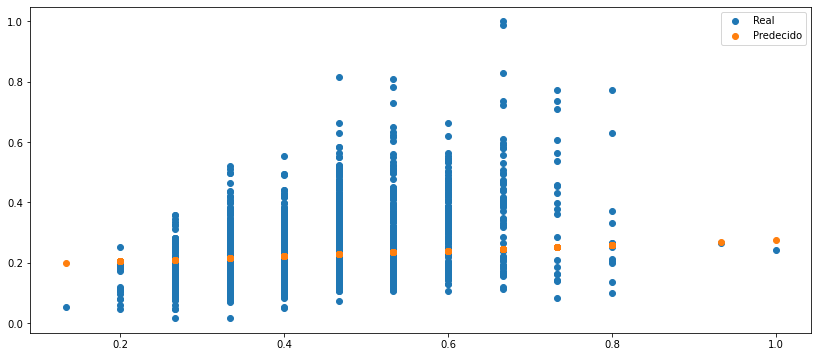

In [21]:
import matplotlib.pyplot as plt

def model(b0, b1, x_train):
    return b1 * x_train + b0

def print_regression_line(b0, b1, X_print, X, Y):
    plt.rcParams["figure.figsize"] = (14,6)
    plt.rcParams["lines.linewidth"] = 3
    plt.rcParams["axes.labelsize"] = 20
    plt.scatter(X_print, Y, label="Real")
    plt.scatter(X_print, model(b0, b1, X), label="Predecido")
    plt.legend(["Real", "Predecido"])
    plt.show()

print_regression_line(b0, b1, x_train, x_train, y_train)

## 3.3 - Funciones de pérdida (*loss*)

En el tema anterior, hemos descrito las diferentes funciones de pérdida que se aplica cuando construimos redes neuronales para clasificación. Sin embargo, estas funciones no pueden aplicarse a modelos de regresión dada la naturaleza de su salida, ya que el resultado de este tipo de modelos **es un valor numérico de tipo decimal y no un conjunto de clases y/o etiquetas**.

### 3.3.1 - Error cuadrático medio (MSE)

El error cuadrático medio (**Mean Square Error**, MSE por sus siglas en inglés) es, probablemente, **la métrica más sencilla y la más utilizada** para evaluar la pérdida de un modelo de regresión. Se calcula mediante la siguiente formula:

$$
MSE(\mathbf{y}, \mathbf{\hat{y}}) = \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}
$$

Donde $n$ es el número de instancias de entrenamiento que se utilizará para calcular el valor de pérdida, $y_{i}$ el valor de salida esperado e $\hat{y}_{i}$ el valor de salida predecido. Esta métrica nos devuelve siempre valores positivos, de forma que **cuanto más se aproximen a cero mejor será el modelo que hemos construido**. 

Uno de sus grandes problemas es que **aumenta muy rápido con valores extremos** debido al cuadrado de la diferencia de los valores. Esto nos puede causar un problema si no hemos normalizado la variable objetivo y esta trabaja con valores muy grandes/muy pequeños. Por otro lado, es positivo que eleve al cuadrado la diferencia ya que **penaliza fuertemente los valores atípicos**.

Otro problema del MSE es su interpretabilidad, ya que nos está indicando la diferencia cuadrática promedio. **Seria interesante que el error trabajase en la misma "escala" que las predicciones, no en su versión cuadrática**.

### 3.3.2 - Raíz cuadrada del error cuadrático medio (RMSE)

Para solventar las limitaciones del MSE, podemos aplicar la raiz cuadrada al resultado. Con ello, tendriamos el **Root Mean Square Error** (RMSE). Esta función se calcula por tanto mediante la siguiente fórmula:

$$
RMSE(\mathbf{y}, \mathbf{\hat{y}}) = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}} = \sqrt{MSE(y, \hat{y})}
$$

Donde $n$ es el número de instancias de entrenamiento que se utilizará para calcular el valor de pérdida, $y_{i}$ el valor de salida esperado e $\hat{y}_{i}$ el valor de salida predecido. Esta métrica nos devuelve siempre valores positivos, de forma que **cuanto más se aproximen a cero mejor será el modelo que hemos construido**. 

### 3.3.3 - Error absoluto medio (MAE)

El error absoluto medio (**Mean Absolute Error**, MAE por sus siglas en inglés) es una función que permite evaluar un modelo calculando **el error promedio de las diferencias aboslutas** entre las predicciones y los valores reales. Se calcula mediante la siguiente fórmula:

$$
MAE(\mathbf{y}, \mathbf{\hat{y}}) = \frac{\sum_{i=1}^{n}|y_{i} - \hat{y}_{i}|}{n}
$$

Donde $n$ es el número de instancias de entrenamiento que se utilizará para clacular el valor de pérdida, $y_{i}$ el valor de salida esperado e $\hat{y}_{i}$ el valor de salida predecido. Se trata de una función que devuelve siempre valores positivos.

Similar a RMSE, trabaja en la misma escala que las predicciones. Sin embargo, **a diferencia de MSE/RMSE no penaliza tanto los valores atípicos ya que no eleva al cuadrado la diferencia**.

Este tipo de función de pérdida se suele utilizar en elos procesos de análisis de series temporales.

### 3.3.4 - Coeficiente de determinación

El coeficiente de determinación o $R^{2}$ se calcula a partir del MSE pero cuenta con la enorme ventaja de estar libre de escala. Por tanto, no importa si los valores de salida son muy grandes o muy pequeños, el $R^{2}$ siempre se situará en $[-\infty, 1]$. Se calcula de la siguiente forma:

$$
R^{2}(\mathbf{y}, \mathbf{\hat{y}}) = \frac{MSE(y, \hat{y})}{MSE_{\text{baseline}}(y, \hat{y})}
$$

Donde $MSE_{\text{baseline}}$ se calcula por medio de la siguiente fórmula:

$$
MSE(\mathbf{y}, \mathbf{\hat{y}}) = \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \bar{y}_{i})^{2}
$$

Donde  $n$ es el número de instancias de entrenamiento que se utilizará para calcular el valor de pérdida, $y_{i}$ el valor de salida esperado e $\hat{y}$ la **media aritmética** de los valores de $\mathbf{y}$. El valor generado por $MSE_{\text{baseline}}$ **se corresponde con el modelo más simple posible para predecir los valores de** $\mathbf{y}$.

## 3.4 - Regresión lineal simple con redes neuronales

Como ya hemos comentado anteriormente, la regresión lineal simple es el modelo de regresión más sencillo y considera dos variables numéricas: (1) una variable independiente, normalmente identificada como $x$, y (2) una variable dependiente, normalmente identificada como $y$. El objetivo es identificar los coeficientes de la recta de regresión que mejor aproxime los valores de $y$.

En este caso vamos a ver como podemos utilizar una red neuronal para construir un modelo de regresión lineal. Para ello utilizaremos **una única capa oculta con un número de neuronas igual al número de variables de entrada**. Dado que este caso se centra en regresión simple, contaremos con una única neurona.

### 3.4.1 - Preparación de datos

Con respecto a los datos de entrenamiento, vamos a utilizar el [Ames Housing dataset de Kaggle](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset).

En este caso, vamos a utilizar el mismo split que en la sección 3.2.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("./data/AmesHousing.csv")

# Seleccionamos la columna que nos interesa como predictora y le aplicamos normalización estándar
data_x = data["TotRms AbvGrd"] / data["TotRms AbvGrd"].max()

# Seleccionamos la variabla predecir y le aplicamos normalización estándar
data_y = data["SalePrice"] / data["SalePrice"].max()

x_train, x_test, y_train, y_test = train_test_split(
    data_x,
    data_y,
    test_size=0.10,
    random_state=0
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.10,
    random_state=0
)

print(f"Training instances: {x_train.shape[0]}")
print(f"Validation instances: {x_val.shape[0]}")
print(f"Test instances: {x_test.shape[0]}")

Training instances: 2373
Validation instances: 264
Test instances: 293


### 3.4.2 - Construcción de la red

Una vez preparados nuestros datos, ya podemos construir nuestra red neuronal. Para ello, vamos a crear una red formada por una única capa mediante Keras:
* Una capa densa de una neurona con una función de activación de tipo lineal.

In [28]:
import tensorflow as tf
from tensorflow import keras

# Creación de las capas que forman la estructura de la red
layers = [keras.layers.Dense(1,
                             input_shape=(1,),
                             activation=tf.keras.activations.linear)
         ]

# Compilación de la red neuronal
model = keras.Sequential(layers, name="linear_regression_model")
          
# Configuración del algoritmo de optimización y función de loss
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss="mse",
    metrics=[keras.metrics.RootMeanSquaredError(), "mse", "mae"]
)

model.summary()

Model: "linear_regression_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Como podemos ver el modelo solo cuenta con dos parámetros que equivalen a $\beta_{0}$ (bias) y $\beta_{1}$ (el paramétro propio de la neurona).

### 3.4.3 - Entrenamiento

Una vez compilada nuestra red, podemos iniciar el proceso de entrenamiento mediante la función `fit()`. En este caso hemos seleccionado las siguientes opciones:
* Número de epochs: 25
* Tamaño del batch de entrenamiento: 250 instancias

En este caso no seleccionamos un porcentaje del conjunto de entrenamiento como validación ya que vamos a utilizar el anteriormente definido (simplemente para demostrar como se hace).

In [29]:
import datetime
from time import time
from keras.callbacks import TensorBoard

# Definición de los callback de TF Board
tensorboard_callback = TensorBoard(log_dir="logs_linear_regression_simple")

# Ejecución del proceso de aprendizaje
model.fit(
    x_train,
    y_train,
    epochs=25, # Numero de iteraciones
    batch_size=250, # Tamaño de los batches
    validation_data=(x_val, y_val),  # conjunto de validación
    callbacks=[tensorboard_callback]
)

Epoch 1/25
10/10 [==============================] - 1s 43ms/step - loss: 0.0718 - root_mean_squared_error: 0.2680 - mse: 0.0718 - mae: 0.2443 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2350 - val_mse: 0.0552 - val_mae: 0.2074
Epoch 2/25
10/10 [==============================] - 0s 10ms/step - loss: 0.0486 - root_mean_squared_error: 0.2204 - mse: 0.0486 - mae: 0.1918 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1955 - val_mse: 0.0382 - val_mae: 0.1622
Epoch 3/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0342 - root_mean_squared_error: 0.1851 - mse: 0.0342 - mae: 0.1514 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665 - val_mse: 0.0277 - val_mae: 0.1281
Epoch 4/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0253 - root_mean_squared_error: 0.1592 - mse: 0.0253 - mae: 0.1211 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1456 - val_mse: 0.0212 - val_mae: 0.1041
Epoch 5/25
10/10 [==============================] - 0s 9ms/ste

### 3.4.4 - Visualización

In [ ]:
import matplotlib.pyplot as plt

def print_regression_line(model, X_print, X, Y):

## 3.5 - Regresión no lineal múltiple con redes neuronales

### 3.5.1 - Preparación de datos

### 3.5.2 - Construcción de la red

### 3.5.3 - Entrenamiento

### 3.5.4 - Visualización

## 3.6 - Regularización

### 3.6.1 - Regularización L1

### 3.6.2 - Regularización L2

### 3.6.3 - Regularización *Elastic Net*